In [1]:
# Core analysis packages
import numpy as np
import os, sys
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.mediation import Mediation
import statsmodels.formula.api as smf
from statsmodels.stats import anova
from patsy import dmatrices
import bff
# Plotting packages
import matplotlib.pyplot as plt; plt.rcdefaults()
import seaborn as sns 
sns.set(style="ticks", color_codes=True)
sns.set_style("white")
sns.set_style({'xtick.bottom': True, 'ytick.left': True})
colorref = ["gray", "royalblue", "crimson", "goldenrod", "mediumorchid", "seagreen"]
from sklearn.preprocessing import StandardScaler

# iPython magic commands
%matplotlib notebook
%load_ext autoreload
%autoreload 2
%autosave 120

SMALL_SIZE = 12
MEDIUM_SIZE = 12
BIG_SIZE = 14

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
cust_palette = sns.color_palette("Paired")[6:10]
cust_palette = [cust_palette[i] for i in [1,0,3,2]]
cust_palette=sns.color_palette("Set2",2)


Autosaving every 120 seconds


In [3]:
# Load file (from same directory as the notebook)
df_hire = pd.read_excel(os.path.expanduser("hire.xlsx"))
df_m = pd.read_excel(os.path.expanduser("df_male.xlsx"))
df_f = pd.read_excel(os.path.expanduser("df_f.xlsx"))
df = pd.read_excel(os.path.expanduser("df.xlsx"))
df.head()

,PercentF,PercentM,POST_salary,POST_friendly,POST_intelligent,itemnum,partnum,Condition,TimePoint
0,0,1,NaN,NaN,NaN,0,0,Man,PRE
1,0,1,NaN,NaN,NaN,1,0,Man,PRE
2,0,1,NaN,NaN,NaN,0,1,Man,PRE
3,1,0,NaN,NaN,NaN,1,1,Man,PRE
4,1,0,NaN,NaN,NaN,0,2,Man,PRE


<IPython.core.display.Javascript object>


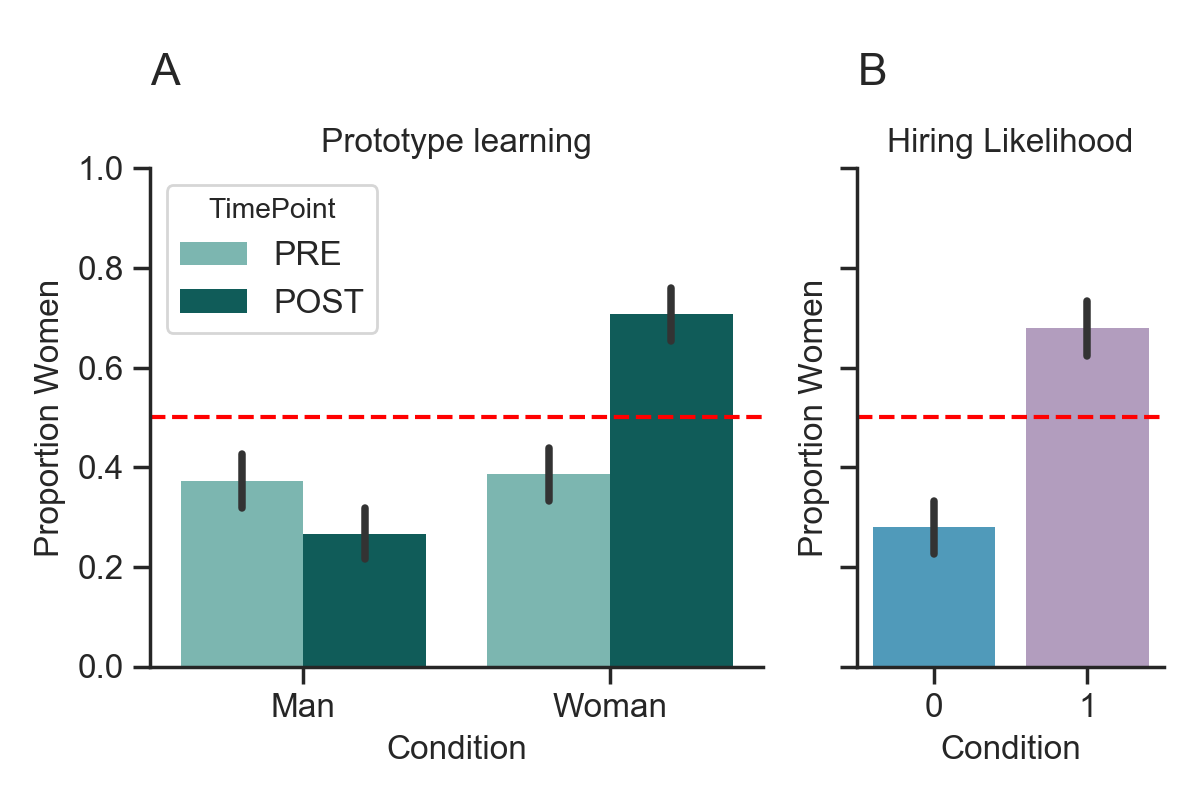

In [7]:
colors = ["#3EA1CC","#B497C4"]
colorspp = ["#72C0B7","#046865"]

fig, ax = plt.subplots(1,2, figsize=(6,4), sharey=True, gridspec_kw={"width_ratios": [2,1]})
sns.barplot(x='Condition', y="PercentF", hue='TimePoint', data=df, \
            palette=colorspp, linewidth = 0, edgecolor=".2", errcolor=".2", \
            ax=ax[0]) 
ax[0].set_ylabel("Proportion Women")
ax[0].set_xlabel("Condition")
ax[0].set_title("Prototype Learning")
ax[0].axhline(y=0.5, color='#FF0000', linestyle='--')
ax[1].axhline(y=0.5, color='#FF0000', linestyle='--')

sns.barplot(x='gender', y="hiref", data=df_hire, \
            palette=colors, linewidth = 0, edgecolor=".2", errcolor=".2", \
            ax=ax[1]) 
ax[1].set_ylabel("Proportion Women", labelpad=10)
ax[1].set_title("Hiring Likelihood")
ax[1].set_xlabel("Condition")
bff.panellabel(ax[0], "A", title="Prototype learning")
bff.panellabel(ax[1], "B", title="Hiring Likelihood")
plt.ylim(0,1)
sns.despine()
plt.tight_layout()

In [5]:
import warnings
warnings.filterwarnings('ignore')

%load_ext rpy2.ipython
# %R library(lme4)

%R library(lmerTest)
%R library("car") # needed for mixed() and attaches lme4 automatically.

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


array(['car', 'carData', 'lmerTest', 'lme4', 'Matrix', 'tools', 'stats',
       'graphics', 'grDevices', 'utils', 'datasets', 'methods', 'base'],
      dtype='<U9')

In [6]:
%Rpush df

In [7]:
%Rpush df_m

In [8]:
%Rpush df_f

In [13]:
%Rpush df_hire

In [9]:
%%R

M <- glmer(PercentF ~ TimePoint  + (1|partnum) + (1|itemnum), data = df_m) 
print(summary(M))

R[write to console]: boundary (singular) fit: see ?isSingular



Linear mixed model fit by REML ['lmerMod']
Formula: PercentF ~ TimePoint + (1 | partnum) + (1 | itemnum)
   Data: df_m

REML criterion at convergence: 719.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.0331 -0.6789 -0.5603  1.3119  1.6661 

Random effects:
 Groups   Name        Variance  Std.Dev. 
 partnum  (Intercept) 1.366e-02 1.169e-01
 itemnum  (Intercept) 1.610e-10 1.269e-05
 Residual             2.017e-01 4.492e-01
Number of obs: 548, groups:  partnum, 137; itemnum, 2

Fixed effects:
             Estimate Std. Error t value
(Intercept)   0.26642    0.02891   9.215
TimePointPRE  0.10584    0.03837   2.758

Correlation of Fixed Effects:
            (Intr)
TimePontPRE -0.664
convergence code: 0
boundary (singular) fit: see ?isSingular



In [10]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: PercentF
              Chisq Df Pr(>Chisq)    
(Intercept) 84.9084  1  < 2.2e-16 ***
TimePoint    7.6071  1   0.005814 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [11]:
%%R

M <- glmer(PercentF ~ TimePoint  + (1|partnum) + (1|itemnum), data = df_f) 
print(summary(M))

Linear mixed model fit by REML ['lmerMod']
Formula: PercentF ~ TimePoint + (1 | partnum) + (1 | itemnum)
   Data: df_f

REML criterion at convergence: 729.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.8330 -0.9263  0.4153  0.7822  1.6889 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.023813 0.15431 
 itemnum  (Intercept) 0.003785 0.06152 
 Residual             0.197151 0.44402 
Number of obs: 548, groups:  partnum, 137; itemnum, 2

Fixed effects:
             Estimate Std. Error t value
(Intercept)   0.70803    0.05278  13.415
TimePointPRE -0.32117    0.03793  -8.466

Correlation of Fixed Effects:
            (Intr)
TimePontPRE -0.359


In [12]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: PercentF
              Chisq Df Pr(>Chisq)    
(Intercept) 179.963  1  < 2.2e-16 ***
TimePoint    71.678  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [14]:
%%R

M <- glmer(hirem ~ gender  + (1|partnum) + (1|itemnum), data = df_hire)
print(summary(M))

Linear mixed model fit by REML ['lmerMod']
Formula: hirem ~ gender + (1 | partnum) + (1 | itemnum)
   Data: df_hire

REML criterion at convergence: 705.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7773 -0.7385  0.3803  0.7362  1.6998 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.007814 0.08840 
 itemnum  (Intercept) 0.004868 0.06977 
 Residual             0.200574 0.44786 
Number of obs: 548, groups:  partnum, 137; itemnum, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.71898    0.05677   12.66
gender      -0.39781    0.03826  -10.40

Correlation of Fixed Effects:
       (Intr)
gender -0.337


In [15]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: hirem
             Chisq Df Pr(>Chisq)    
(Intercept) 160.38  1  < 2.2e-16 ***
gender      108.09  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [12]:
%%R

M <- lmer(POST_friendly ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_friendly ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4555.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.3642 -0.3847  0.0659  0.4797  4.7678 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 266.2102 16.3160 
 itemnum  (Intercept)   0.2986  0.5464 
 Residual             158.1733 12.5767 
Number of obs: 542, groups:  partnum, 137; itemnum, 2

Fixed effects:
               Estimate Std. Error      df t value Pr(>|t|)    
(Intercept)      69.850      1.636  30.821  42.706  < 2e-16 ***
ConditionWoman    2.899      1.083 403.671   2.677  0.00774 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.329


In [13]:
%%R

M <- lmer(POST_intelligent ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_intelligent ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4526.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.1633 -0.3865  0.0532  0.4466  3.8992 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 238.434  15.441  
 itemnum  (Intercept)   1.339   1.157  
 Residual             143.714  11.988  
Number of obs: 545, groups:  partnum, 137; itemnum, 2

Fixed effects:
               Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)     72.4308     1.7144   9.5770  42.248  3.3e-12 ***
ConditionWoman   0.6349     1.0278 406.1532   0.618    0.537    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.300


In [14]:
%%R

M <- lmer(POST_salary ~ Condition  + (1|partnum) + (1|itemnum), data = df)
print(summary(M))

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: POST_salary ~ Condition + (1 | partnum) + (1 | itemnum)
   Data: df

REML criterion at convergence: 4578.2

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.81870 -0.50084 -0.01655  0.50090  3.15874 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 263.557  16.234  
 itemnum  (Intercept)   7.355   2.712  
 Residual             148.499  12.186  
Number of obs: 548, groups:  partnum, 137; itemnum, 2

Fixed effects:
               Estimate Std. Error       df t value Pr(>|t|)    
(Intercept)     57.3942     2.4786   2.4155  23.156 0.000678 ***
ConditionWoman  -0.9453     1.0411 408.9988  -0.908 0.364455    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
ConditinWmn -0.210


Linear mixed model fit by REML ['lmerMod']
Formula: hirem ~ gender + (1 | partnum) + (1 | itemnum)
   Data: df_hire

REML criterion at convergence: 705.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7773 -0.7385  0.3803  0.7362  1.6998 

Random effects:
 Groups   Name        Variance Std.Dev.
 partnum  (Intercept) 0.007814 0.08840 
 itemnum  (Intercept) 0.004868 0.06977 
 Residual             0.200574 0.44786 
Number of obs: 548, groups:  partnum, 137; itemnum, 2

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.71898    0.05677   12.66
gender      -0.39781    0.03826  -10.40

Correlation of Fixed Effects:
       (Intr)
gender -0.337


In [21]:
%%R
car::Anova(M, type=3)

Analysis of Deviance Table (Type III Wald chisquare tests)

Response: hirem
             Chisq Df Pr(>Chisq)    
(Intercept) 160.38  1  < 2.2e-16 ***
gender      108.09  1  < 2.2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
